In [1]:
# Essential Libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('IMDB_Dataset.csv', encoding='unicode_escape')
#data['sentiment'] = data['sentiment'].replace(['positive', 'negative'], [1, 0])

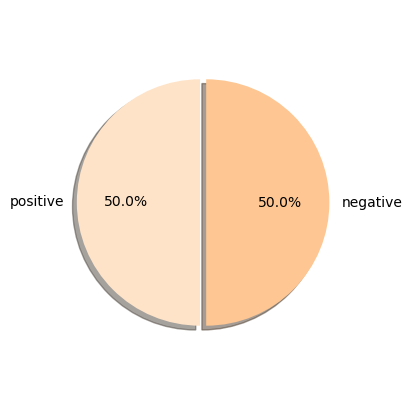

In [3]:
color = sns.color_palette("Oranges") 
plt.figure(figsize=(5, 5))
plt.pie(x = data.sentiment.value_counts().sort_values(),  
        labels = ["positive", "negative"],
        colors = color, 
        autopct = '%1.1f%%', 
        shadow = True,
        radius = 0.8,
        startangle = 90,
        explode= [0.02, 0.02])
plt.show()

Preprocessing (EDA)

In [4]:
# Data analysis: data types, number of columns, and data rows
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


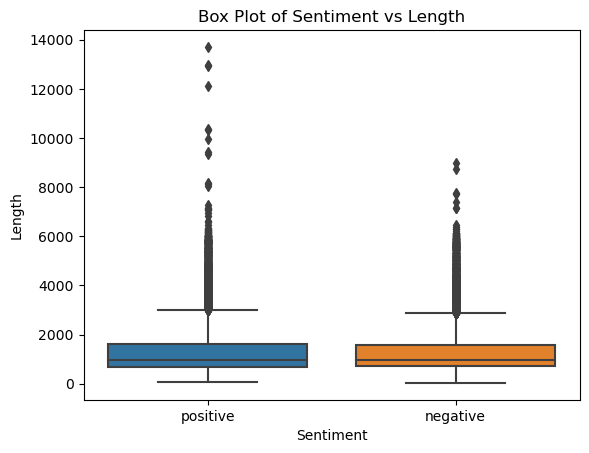

In [5]:
data['length'] = data['review'].apply(len)
sns.boxplot(x='sentiment', y='length', data=data)
plt.xlabel('Sentiment')
plt.ylabel('Length')
plt.title('Box Plot of Sentiment vs Length')
plt.show()

TF-IDF

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)

In [7]:
# Convert training data to TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

LR

In [8]:
# Initialize and train the logistic regression model
model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=10000)

Result

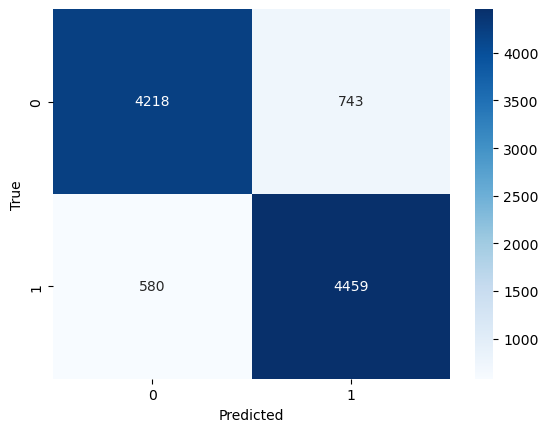

In [9]:
# Create a confusion matrix
y_pred = model.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

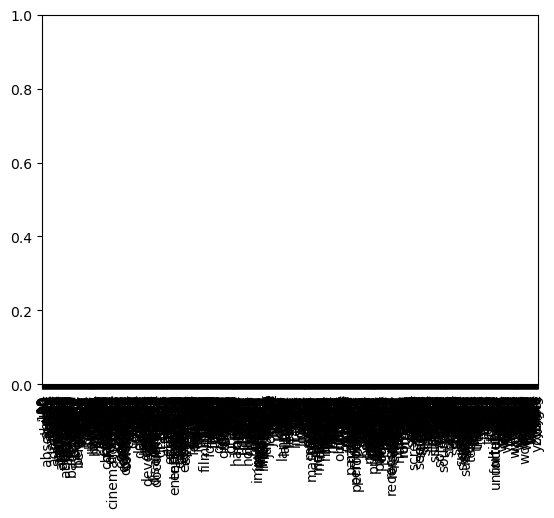

In [10]:
x_ticks = range(len(vectorizer.get_feature_names_out())) 
plt.xticks(x_ticks, vectorizer.get_feature_names_out(), rotation=90)
plt.show()

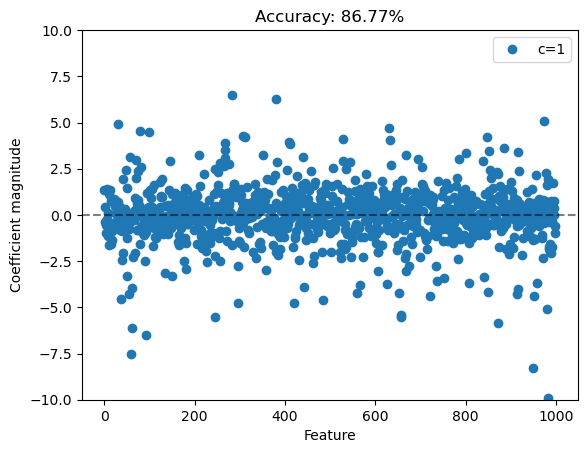

In [11]:
accuracy = model.score(X_test_tfidf, y_test)
plt.plot(model.coef_.T, 'o', label="c=1")
plt.axhline(0, color='k', linestyle='--', alpha=0.5)
plt.ylabel("Coefficient magnitude")
plt.xlabel("Feature")
plt.ylim(-10, 10)
plt.legend()
plt.title("Accuracy: " + str(round(accuracy*100,2)) + "%")
plt.show()